# Avaliação 02 - Introdução ao Aprendizado de Máquina (ENGG67)
**Alunos:**

- **Daniel da Rocha Carneiro**

- **Maurício dos Santos de Jesus**

- **Theo Farias**

----------

## 1) Utilizando o banco de dados “Iris Flower Data Set”, aborde o problema de classificação utilizando o algoritmo k-NN. Implemente a classificação em Jupyter Notebook.

#### Importação dos dados e transformações feitas anteriormente

Tomando como base os dataframes produzidos no trabalho anterior, realizou-se a importação das bibliotecas e da base de dados. Para fins comparativos, iremos avaliar a precisão do algoritmo k-NN com e sem métodos de validação cruzada.

In [ ]:
import pandas as pd
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

import seaborn as sns

%matplotlib inline

#Carrega o conjunto de dados
iris = load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

df['target'] = iris['target']


#Realiza a transformação PCA
X = iris['data']
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)
df_transformed = pd.DataFrame(data=X_transformed, columns=['PC1', 'PC2'])
df_transformed['target'] = iris['target']

### Análise gráfica dos dados

In [ ]:
df.head(5)

In [ ]:
species = ['setosa', 'versicolor', 'virginica']
print("0 - Setosa")
print("1 - Versicolor")
print("2 - Virginica")
plt.figure(figsize=(15,10))
parallel_coordinates(df, "target")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Atributos', fontsize=15)
plt.ylabel('Valor dos atributos', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show(block=False);

In [ ]:
species = ['setosa', 'versicolor', 'virginica']
print("0 - Setosa")
print("1 - Versicolor")
print("2 - Virginica")
plt.figure(figsize=(15,10))
andrews_curves(df, "target")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show(block=False);

In [ ]:
species = ['setosa', 'versicolor', 'virginica']
print("0 - Setosa")
print("1 - Versicolor")
print("2 - Virginica")
plt.figure()
sns.pairplot(df, hue = "target",palette="pastel",  size=3, markers=["o", "s", "D"])
plt.show()

## Validação simples

Nessa seção inicial, os dados serão separados em 2 conjuntos, onde um deles será usado para testes e outro para treinamento. Optou-se por utilizar 1/5 dos dados para testes e o restante para treinamento.

In [18]:
columns = iris['feature_names']
X = df[columns].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
# Classificador k 
nVizinhos = 3
classifier = KNeighborsClassifier(n_neighbors=nVizinhos)

# Treinar modelo
classifier.fit(X_train, y_train)

# Usar os dados de teste para validação
y_pred = classifier.predict(X_test)

accuracy = 0
accuracy = accuracy_score(y_test, y_pred)*100

print('Para um valor de k=' + str(nVizinhos) + ', a acurâcia do modelo foi de ' + str(round(accuracy, 2)) + ' %.')


Para um valor de k=3, a acurâcia do modelo foi de 96.67 %.


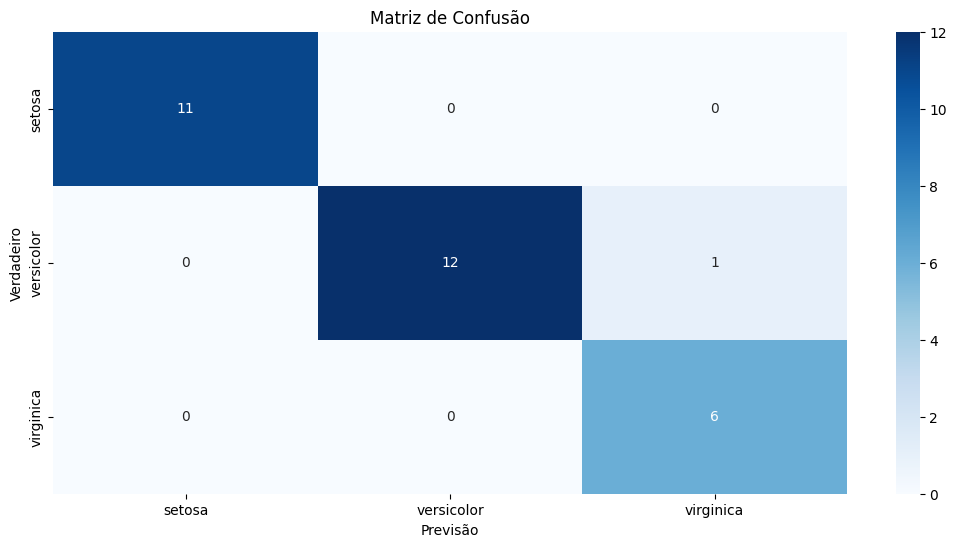

In [20]:
species = ['setosa', 'versicolor', 'virginica']
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12.8,6))
sns.heatmap(cm, annot=True, xticklabels=species, yticklabels=species, cmap="Blues", fmt="g")
plt.xlabel('Previsão'); plt.ylabel('Verdadeiro'); plt.title('Matriz de Confusão')

plt.show()

Apesar do método apresentar uma acurácia satisfatória, os resultados apresentados não tem valor significativo, visto que fenomênos como overfitting podem estar ocorrendo, visto que apenas uma parte dos dados é utilizada como teste ou treinamento. Para solocionar este problema, podemos utilizar métodos de validação cruzada (_cross validation_).

## Fine tune do valor de K com validação cruzada

Utilizou-se um método iterativo para determinar qual o valor de K retornava o menor erro e portanto, apresenta maior acurácia. Para isso, utilizou-se o método de validação cruzada com K-fold = 10. Este método basicamente divide a base de dados de forma aleatória em um número de K de partes e para cada iteração, um conjunto formado por K-1 subconjuntos são utilizados para treinamento e o subconjunto restante é utilizado para teste gerando um resultado de métrica para avaliação. Desta forma, todos os dados no fim são utilizados para testes e pode-se usar a acurácia média ou outras métricas para avaliação do algoritmo.



In [21]:
# Cria-se uma lista de Ks de 1 a 50, com step de 1
k_list = list(range(1,50,1))

# Iniciliza vetor de pontuação/acurácia
scores = []

# Validação cruzada com K-fold = 10
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())

<Figure size 640x480 with 0 Axes>

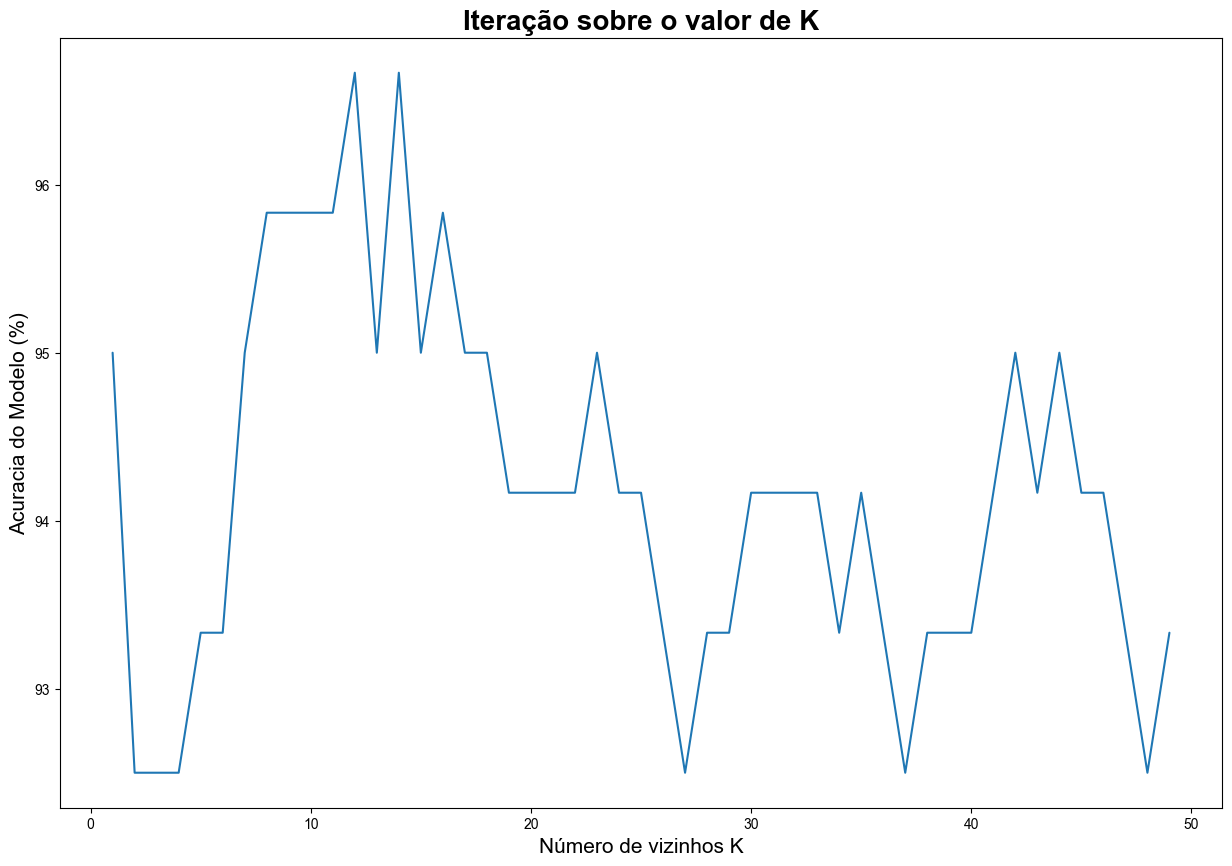

In [22]:
# Calcula-se o erro de classificação
MSE = [1 - x for x in scores]

modelAccuracy = []
for item in scores:
    modelAccuracy.append(item * 100)


plt.figure()
plt.figure(figsize=(15,10))
plt.title('Iteração sobre o valor de K', fontsize=20, fontweight='bold')
plt.xlabel('Número de vizinhos K', fontsize=15)
plt.ylabel('Acuracia do Modelo (%)', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, modelAccuracy)

plt.show()

In [23]:

best_k = k_list[MSE.index(min(MSE))] #Procura-se qual valor de K apresentou o menor erro/maior precisão
print("O número ótimo para K é de %d vizinhos." % best_k)

O número ótimo para K é de 12 vizinhos.


## Verificação do resultado encontrado

Portanto, com o valor de k ótimo encontrado, treina-se o algoritmo k-NN para k = 12. Verificou-se o desempenho do algoritmo por dois métodos:

### Validação simples

Utiliza-se o conjunto de testes definido inicialmente para verificar a acurácia do modelo e verificar sua matriz de confusão. Pode-se perceber que a acurácia apresentada pode depender diretamente dos dados que foram escolhidos aleatóriamente para pertencer o conjunto de testes.

In [24]:
nVizinhos = best_k
nfolds = 10
knn = KNeighborsClassifier(n_neighbors=nVizinhos)

classifier = KNeighborsClassifier(n_neighbors=nVizinhos)

# Treinar modelo
classifier.fit(X_train, y_train)

#Faz predições dos dados de teste
pred = classifier.predict(X_test) 

accuracy = 0
accuracy = accuracy_score(y_test, pred)*100

print('Para o conjuntos de testes em questão, a acurâcia do modelo foi de ' + str(round(accuracy, 2)) + ' %.')


Para o conjuntos de testes em questão, a acurâcia do modelo foi de 100.0 %.


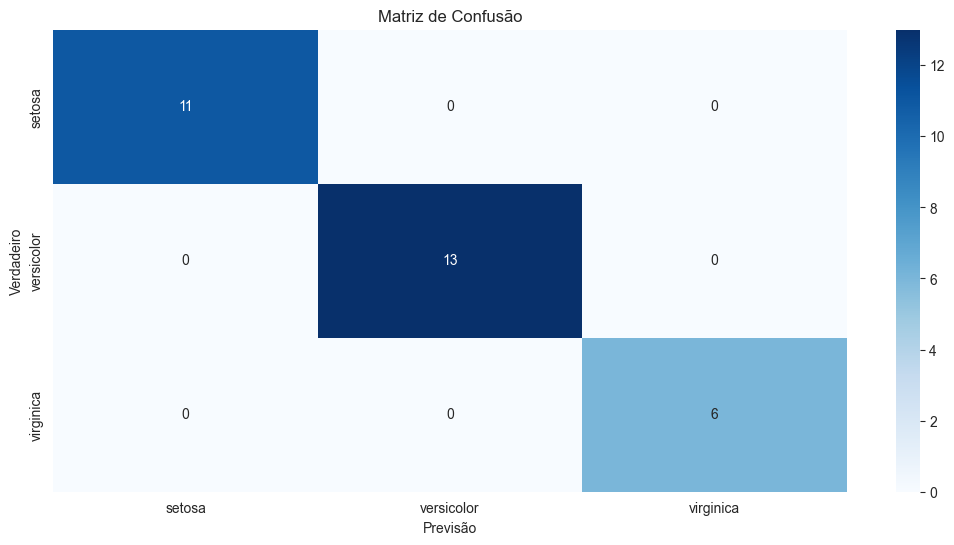

In [26]:
species = ['setosa', 'versicolor', 'virginica']
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(12.8,6))
sns.heatmap(cm, annot=True, xticklabels=species, yticklabels=species, cmap="Blues", fmt="g")
plt.xlabel('Previsão'); plt.ylabel('Verdadeiro'); plt.title('Matriz de Confusão')

plt.show()

### Validação cruzada

Utiliza-se o método de validação cruzada com N-fold igual a 10 para verificar a acurácia média e sua margem de erro padrão.

In [27]:

scoringList = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(knn, X_train, y_train, cv=nfolds, return_train_score="true", return_estimator="true")
meanScore = scores["test_score"].mean()
stdScore = np.std(scores["test_score"])
print('Avaliando modelo com valor de k=' + str(nVizinhos) + ' e ' + str(nfolds) + ' folds:')
print('Acurácia média é de ' + "{:.2f}".format(meanScore*100) + '±' + "{:.2f}".format(stdScore) + '%.')

Avaliando modelo com valor de k=12 e 10 folds:
Acurácia média é de 96.67±0.06%.


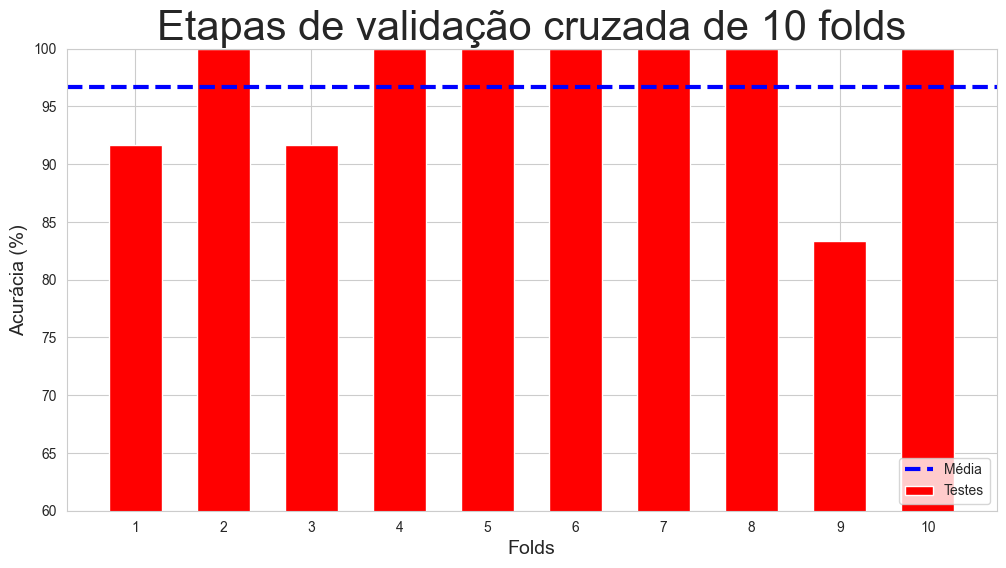

In [28]:
plt.figure(figsize=(12,6))
labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
X_axis = np.arange(len(labels))
ax = plt.gca()
plt.ylim(60, 100)
plt.bar(X_axis, scores["test_score"]*100, 0.6, color='red', label='Testes')
plt.axhline(meanScore*100, 0 , 9, color='b', linestyle='--', linewidth=3, label='Média')
plt.title("Etapas de validação cruzada de 10 folds", fontsize=30)
plt.xticks(X_axis, labels)
plt.xlabel("Folds", fontsize=14)
plt.ylabel("Acurácia (%)", fontsize=14)
plt.legend(loc=4)
plt.grid(True)
plt.show()